#PROYECTO PARCIAL: Clasificación de Fallas eléctricas

Materia: Aprendizaje Automático

Profesor: Caballero, Nicolas

Alumno: Espindola, Matias

## Configuración Inicial, Librerias y Carga de Datos

In [ ]:
# Librerias

# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento y modelado (scikit-learn)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Modelos de clasificación
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Métricas de evaluación
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

# Configuración de visualización
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})

print ('Librerias fundamentales cargadas exitosamente')

Librerias fundamentales cargadas exitosamente


In [ ]:
# Carga del dataset
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks_2AÑO1CUATRI/Aprendizaje Automatico/Parcial/archivos_dataset/faultdata-new.csv',
                 skiprows=1, # para saltar la primera fila (la descripcion larga del encabezado)
                 sep=',', # asegura que el separador sea una coma
                 )
df.head()

,R,i25a,i25b,i25c,ira,irb,irc,isa,isb,isc,v25a,v25b,v25c,pg,qg,pr,qr,ps,qs,Target
0,0.01,5.1569,3.2233,2.2075,0.0032,0.003,0.0033,0.0035,0.0034,0.0028,842.5337,667.7393,334.0726,1040.0,1540.0,0.000048,0.00005,0.000135,0.000142,1
1,0.02,5.1569,3.2233,2.2075,0.0032,0.003,0.0033,0.0035,0.0034,0.0028,842.5337,667.7393,334.0726,1040.0,1540.0,0.000048,0.00005,0.000135,0.000142,1
2,0.04,5.1569,3.2233,2.2075,0.0032,0.003,0.0033,0.0035,0.0034,0.0028,842.5337,667.7393,334.0726,1040.0,1540.0,0.000048,0.00005,0.000135,0.000142,1
3,0.06,5.1569,3.2233,2.2075,0.0032,0.003,0.0033,0.0035,0.0034,0.0028,842.5337,667.7393,334.0726,1040.0,1540.0,0.000048,0.00005,0.000135,0.000142,1
4,0.08,5.1569,3.2233,2.2075,0.0032,0.003,0.0033,0.0035,0.0034,0.0028,842.5337,667.7393,334.0726,1040.0,1540.0,0.000048,0.00005,0.000135,0.000142,1


In [ ]:
# Renombrar la columna 'Target'
df.rename(columns={'Target': 'CLASE_FALLA'}, inplace=True)

# Print de validación de carga y forma del dataframe
print(f'Columna "Target" renombrada a "CLASE_FALLA".')
print(f'\n DATASET CARGADO: Acceso y validación OK.')
display(df.head(2))
print(f'Instancias: {df.shape[0]}, Características: {df.shape[1]}')

Columna "Target" renombrada a "CLASE_FALLA".

 DATASET CARGADO: Acceso y validación OK.


,R,i25a,i25b,i25c,ira,irb,irc,isa,isb,isc,v25a,v25b,v25c,pg,qg,pr,qr,ps,qs,CLASE_FALLA
0,0.01,5.1569,3.2233,2.2075,0.0032,0.003,0.0033,0.0035,0.0034,0.0028,842.5337,667.7393,334.0726,1040.0,1540.0,0.000048,0.00005,0.000135,0.000142,1
1,0.02,5.1569,3.2233,2.2075,0.0032,0.003,0.0033,0.0035,0.0034,0.0028,842.5337,667.7393,334.0726,1040.0,1540.0,0.000048,0.00005,0.000135,0.000142,1


Instancias: 1788, Características: 20


## Análisis Exploratorio de Datos (EDA)

In [ ]:
# Análisis estadistico
print('Análisis estadístico de las variables predictoras:')
display(df.describe().T)

Análisis estadístico de las variables predictoras:


,count,mean,std,min,25%,50%,75%,max
R,1788.0,342.924899,3.313180e+02,0.010000,8.500000,260.000000,630.000000,1000.000000
i25a,1788.0,5.710033,1.599097e+00,4.663600,5.156900,5.156900,5.156900,11.997700
i25b,1788.0,4.099235,2.065721e+00,2.888800,3.223300,3.223300,3.223300,11.336600
i25c,1788.0,2.994039,2.250871e+00,0.004600,2.207500,2.207500,2.207500,11.420400
ira,1788.0,0.003287,3.363585e-04,0.003100,0.003200,0.003200,0.003200,0.005400
irb,1788.0,0.003090,2.855546e-04,0.003000,0.003000,0.003000,0.003000,0.004600
irc,1788.0,0.003366,2.270282e-04,0.003200,0.003300,0.003300,0.003300,0.004700
isa,1788.0,0.003495,2.544926e-05,0.003400,0.003500,0.003500,0.003500,0.003700
isb,1788.0,0.003425,1.289127e-04,0.003300,0.003400,0.003400,0.003400,0.004400
isc,1788.0,0.002926,3.630004e-04,0.002800,0.002800,0.002800,0.002800,0.004300


Se detectan variables con STD = 0, lo que significa que todos los valores en esa columna son idénticos. Por lo cual opto por eliminar variables que tengan varianza cero para evitar problemas en las etapas posteriores de modelado.

In [ ]:
# Separamos X para el cálculo de STD
X = df.drop('CLASE_FALLA', axis=1)
std_check = X.std()

# Buscamos variables con STD igual a 0 o valores extramadamente bajos
const_cols = std_check[std_check < 1e-10].index.tolist() # usamos un umbral para mayor robustez

if const_cols:
  print(f'Variables constantes encontradas (STD=0): {const_cols}')
else:
  print('No se encontraron variables constantes (STD=0).')

Variables constantes encontradas (STD=0): ['qs']


In [ ]:
# Eliminación de la columna 'qs' al tener STD=0
df = df.drop(columns=const_cols)
print(f'Columna constante eliminada: {const_cols[0]}')

Columna constante eliminada: qs


In [ ]:
# Definición de variables X e Y
X = df.drop('CLASE_FALLA', axis=1)
y = df['CLASE_FALLA']

print(f'Dataset final con {df.shape[1]} columnas ({X.shape[1]} predictoras)')

Dataset final con 19 columnas (18 predictoras)


In [ ]:
# Inspección de tipos de datos y valores nulos
print('Tipo de datos y valores nulos:')
print(df.info())

# Comprobar si existe valores nulos y duplicados
print(f'\n Total de valores nulos: {df.isnull().sum().sum()}')
print(f'\nTotal de valores duplicados:{df.duplicated().sum()}')

Tipo de datos y valores nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1788 entries, 0 to 1787
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   R            1788 non-null   float64
 1   i25a         1788 non-null   float64
 2   i25b         1788 non-null   float64
 3   i25c         1788 non-null   float64
 4   ira          1788 non-null   float64
 5   irb          1788 non-null   float64
 6   irc          1788 non-null   float64
 7   isa          1788 non-null   float64
 8   isb          1788 non-null   float64
 9   isc          1788 non-null   float64
 10  v25a         1788 non-null   float64
 11  v25b         1788 non-null   float64
 12  v25c         1788 non-null   float64
 13  pg           1788 non-null   float64
 14  qg           1788 non-null   float64
 15  pr           1788 non-null   float64
 16  qr           1788 non-null   float64
 17  ps           1788 non-null   float64
 18  CLASE_FALLA  1788

In [ ]:
# Análisis de la variable objetivo (CLASE_FALLA)
print('Análisis de la variable objetivo (CLASE_FALLA):')
conteo_clases = df['CLASE_FALLA'].value_counts()
porcentaje_clases = df['CLASE_FALLA'].value_counts(normalize=True) * 100
print('Conteo de registros por clase de falla:')
print(conteo_clases)
print('\nPorcentaje de registros por clase de falla:')
print(porcentaje_clases.round(2))

Análisis de la variable objetivo (CLASE_FALLA):
Conteo de registros por clase de falla:
CLASE_FALLA
1     149
2     149
3     149
4     149
5     149
6     149
7     149
8     149
9     149
10    149
11    149
12    149
Name: count, dtype: int64

Porcentaje de registros por clase de falla:
CLASE_FALLA
1     8.33
2     8.33
3     8.33
4     8.33
5     8.33
6     8.33
7     8.33
8     8.33
9     8.33
10    8.33
11    8.33
12    8.33
Name: proportion, dtype: float64


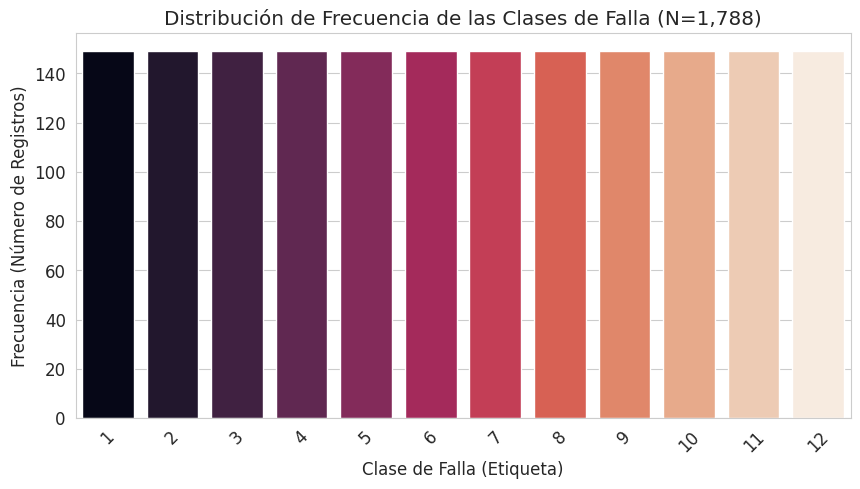


--- Conclusión sobre el Balance ---
Ratio Máxima/Mínima: 1.00
El dataset está balanceado.


In [ ]:
# Visualización de la distribución de clases
plt.figure(figsize=(10, 5))
sns.barplot(
    x=conteo_clases.index,
    y=conteo_clases.values,
    hue=conteo_clases.index,
    palette='rocket',
    legend=False # desactiva la leyenda, que es redundante con el eje X
    )
plt.title('Distribución de Frecuencia de las Clases de Falla (N=1,788)')
plt.xlabel('Clase de Falla (Etiqueta)')
plt.ylabel('Frecuencia (Número de Registros)')
plt.xticks(rotation=45)
plt.show()

# Conclusión sobre el Balance
min_clase = conteo_clases.min()
max_clase = conteo_clases.max()
ratio = max_clase / min_clase

print('\n--- Conclusión sobre el Balance ---')
print(f'Ratio Máxima/Mínima: {ratio:.2f}')

if ratio > 2.5:
    print('ADVERTENCIA: Alto desbalance. Enfoque en F1-Score y Recall.')
else:
    print('El dataset está balanceado.')

In [ ]:
# Generamos histogramas y boxplots para subconjunto de variables
# para reducir el impacto visual de tener 18 graficos en un mismo bloque
def plot_features(columns_to_plot, title_suffix):

    n_vars = len(columns_to_plot)
    # 2 gráficos (hist + box) por variable, en 3 filas (para 6 variables)
    n_rows = n_vars

    fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(15, 4.5 * n_rows))
    plt.suptitle(f'Distribución y Outliers: {title_suffix}', y=1.005, fontsize=16)
    fig.tight_layout(pad=3.0, h_pad=2.0)

    for i, col in enumerate(columns_to_plot):
        # Histograma (Distribución) - Columna 0
        sns.histplot(X[col], kde=True, ax=axes[i, 0], color='skyblue')
        axes[i, 0].set_title(f'Distribución de {col}', fontsize=12)
        axes[i, 0].axvline(X[col].median(), color='red', linestyle='--', linewidth=1)

        # Boxplot (Outliers y Escala) - Columna 1
        sns.boxplot(y=X[col], ax=axes[i, 1], color='lightcoral', orient='v')
        axes[i, 1].set_title(f'Outliers en {col}', fontsize=12)
        axes[i, 1].set_ylabel(f'Valor de {col}', fontsize=10) # Etiqueta al eje Y (la medición)
        axes[i, 1].set_xlabel('') # limpiamos el eje X

    plt.show()
    print("-" * 50)

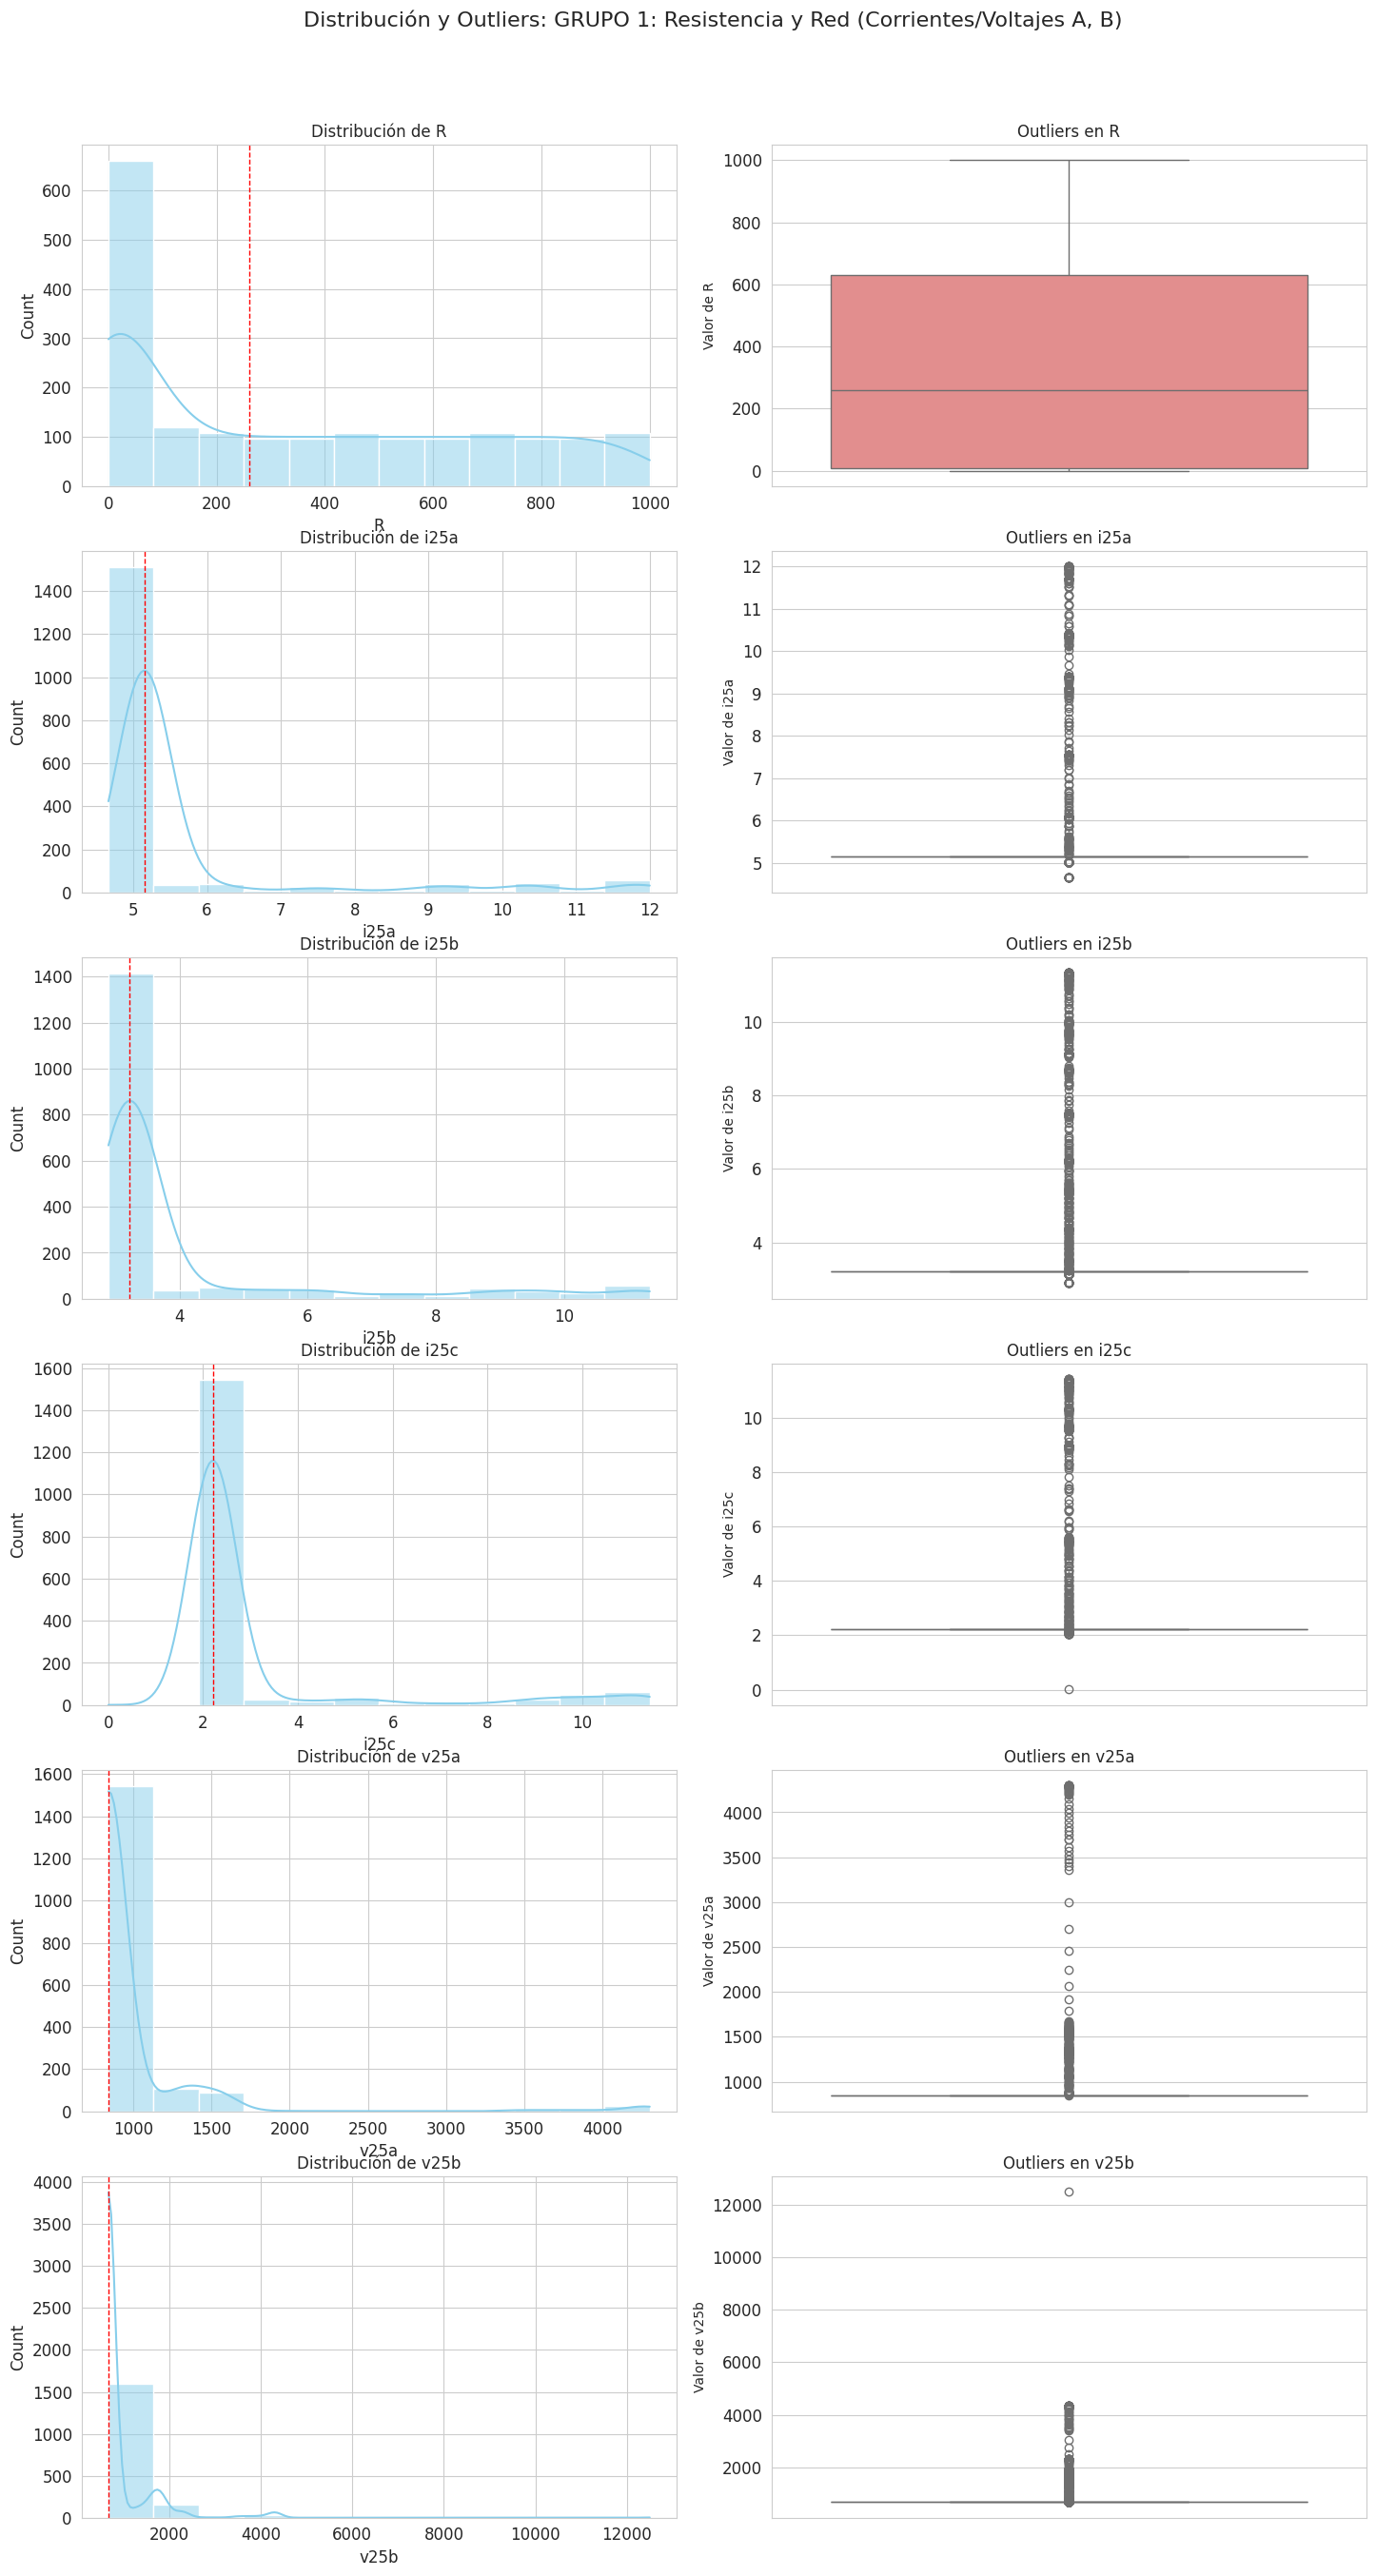

--------------------------------------------------


In [ ]:
# Grupo 1 'Globales y Red' (i25,v25a,v25b)
cols_grupo1 = ['R', 'i25a', 'i25b', 'i25c', 'v25a', 'v25b']
plot_features(cols_grupo1, "GRUPO 1: Resistencia y Red (Corrientes/Voltajes A, B)")

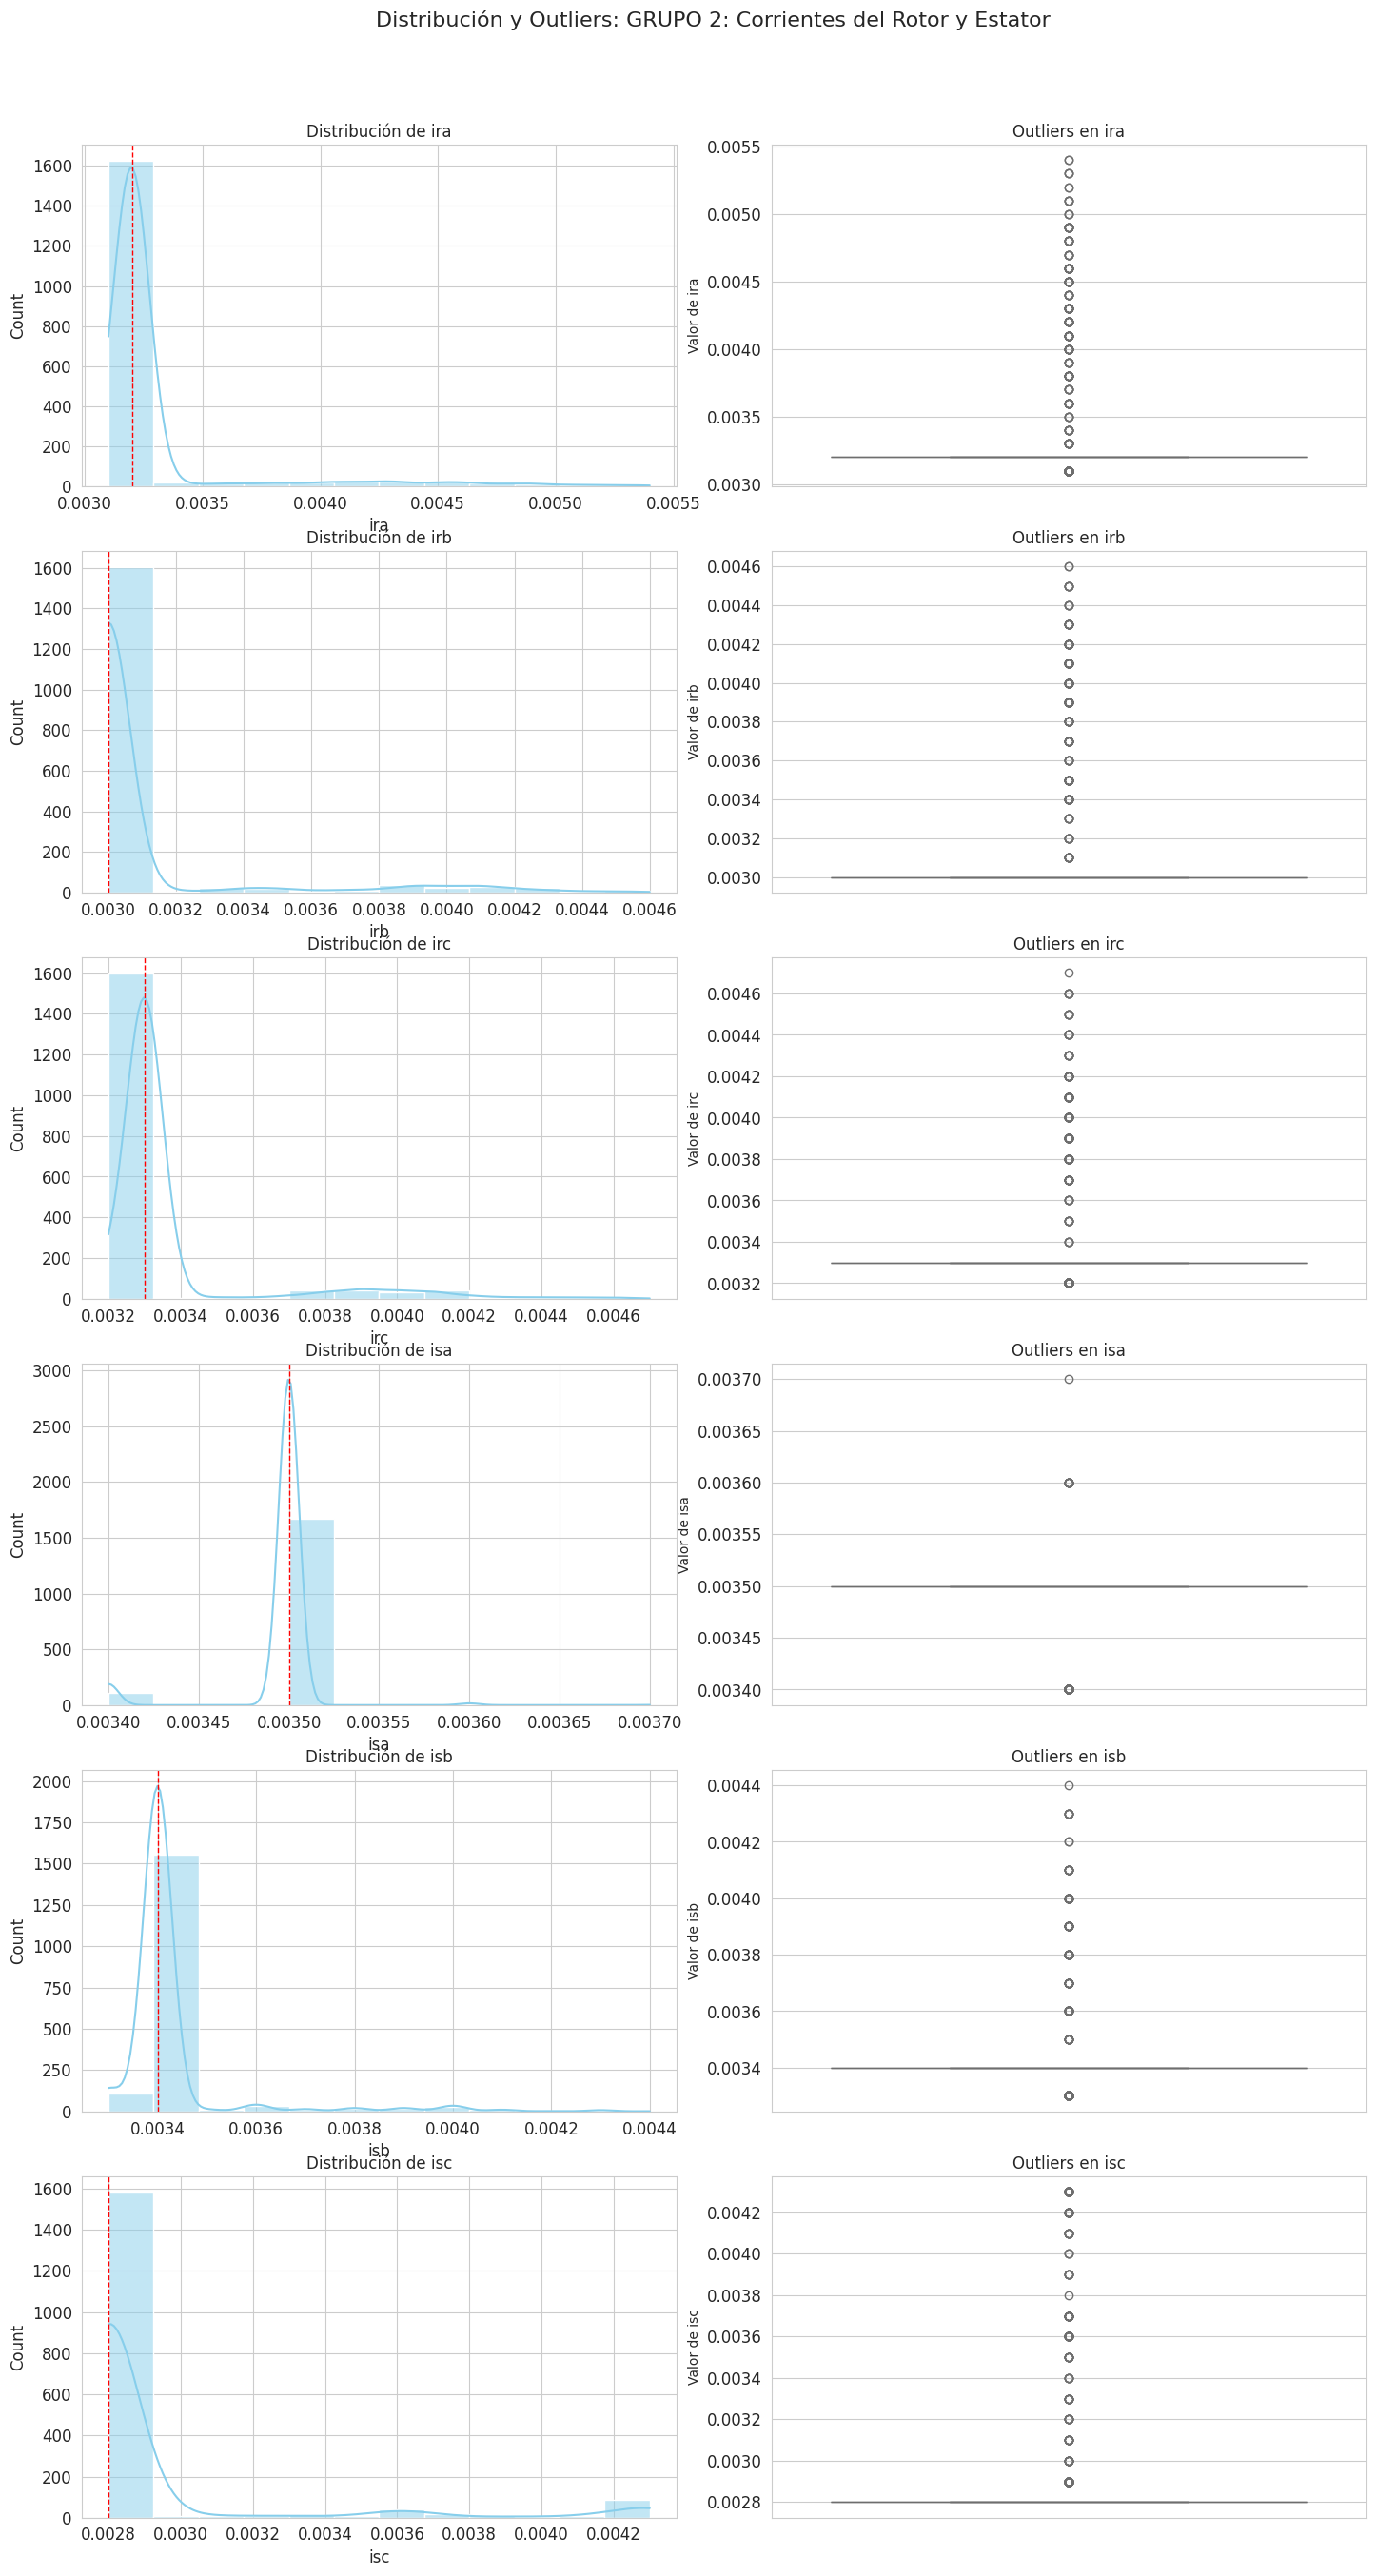

--------------------------------------------------


In [ ]:
# Grupo 2 'Corrientes del Rotor y Estator'
cols_grupo2 = ['ira', 'irb', 'irc', 'isa', 'isb', 'isc']
plot_features(cols_grupo2, "GRUPO 2: Corrientes del Rotor y Estator")

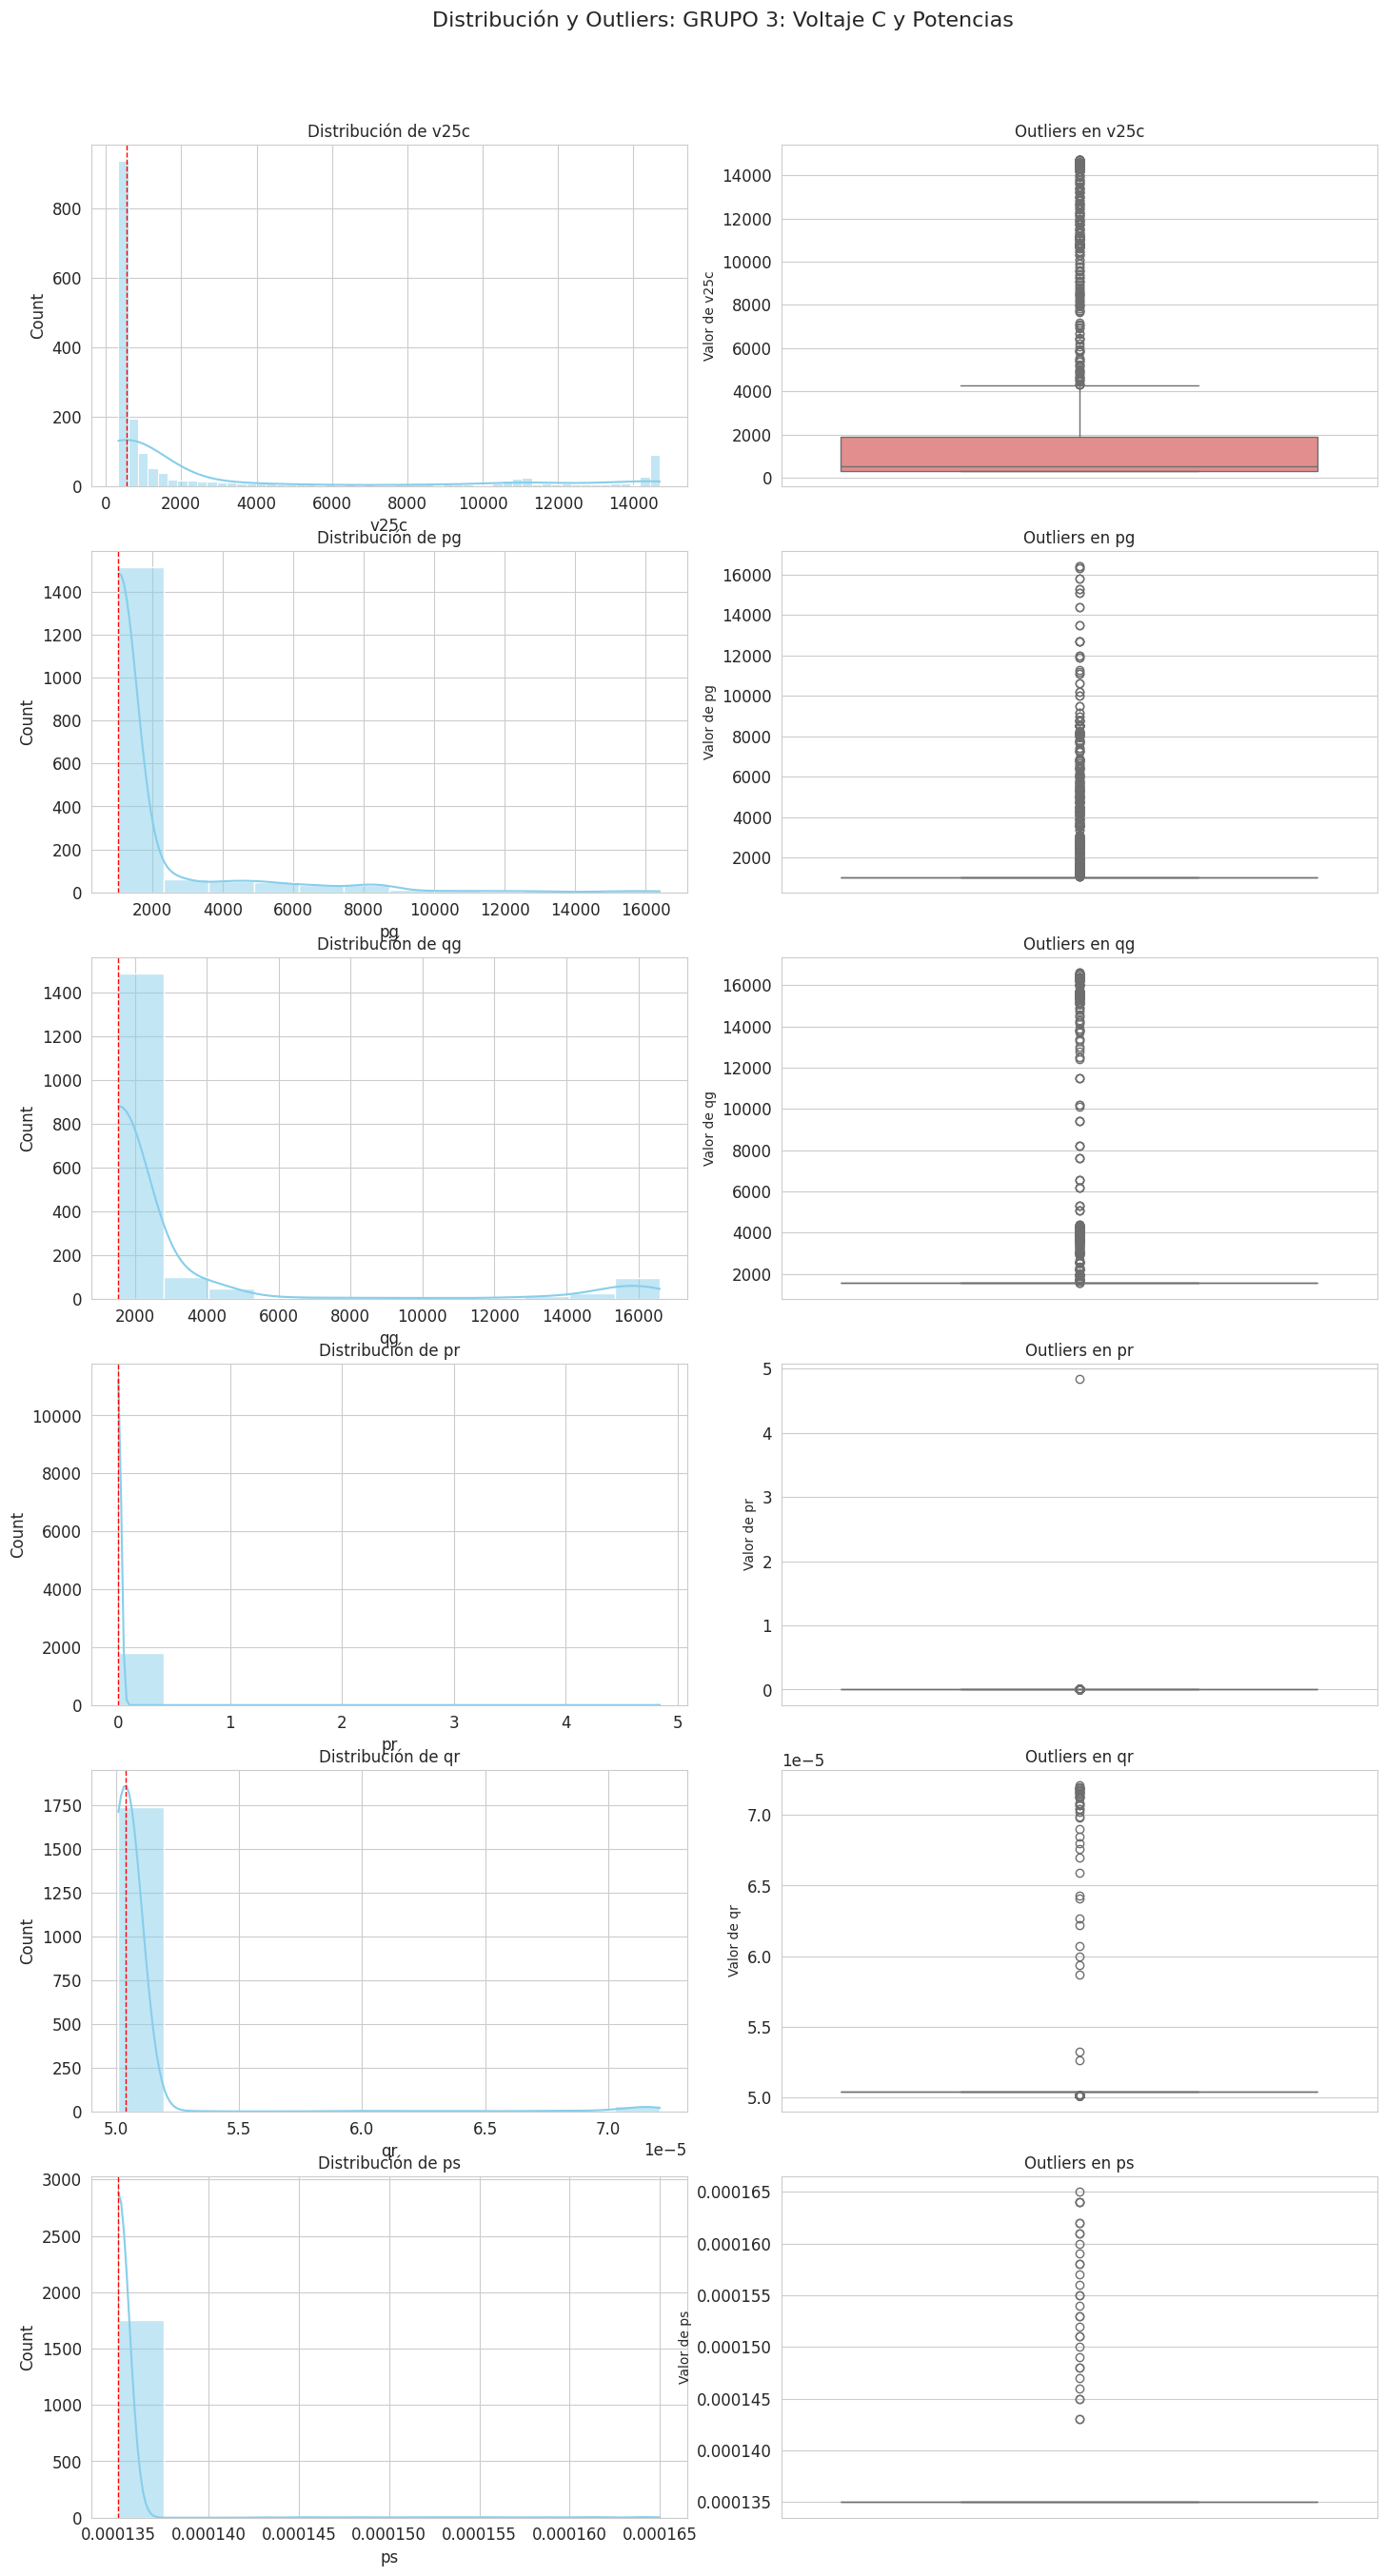

--------------------------------------------------


In [ ]:
# Grupo 3 'Voltajes Restantes y Potencias'
cols_grupo3 = ['v25c', 'pg', 'qg', 'pr', 'qr', 'ps']
plot_features(cols_grupo3, "GRUPO 3: Voltaje C y Potencias")

In [ ]:
# Análisis de correlación
correlacion = df.corr()

# Correlación con la variable objetivo (CLASE_FALLA)
correlacion_objetivo = correlacion['CLASE_FALLA'].sort_values(ascending=False)
print('\nCorrelación absoluta de variables predictoras con CLASE_FALLA:')
print(correlacion_objetivo.drop('CLASE_FALLA')) # excluimos la correlación consigo misma




Correlación absoluta de variables predictoras con CLASE_FALLA:
isa     2.836933e-01
v25a    2.440449e-01
v25b    2.177322e-01
v25c    1.314701e-01
qr      1.001754e-01
ps      7.370966e-02
i25c    1.894648e-02
R      -4.809030e-16
pg     -2.163494e-02
pr     -3.083698e-02
isc    -3.716668e-02
i25a   -4.733886e-02
isb    -5.279955e-02
irc    -6.181795e-02
i25b   -6.526674e-02
ira    -1.430248e-01
qg     -1.495465e-01
irb    -1.601564e-01
Name: CLASE_FALLA, dtype: float64


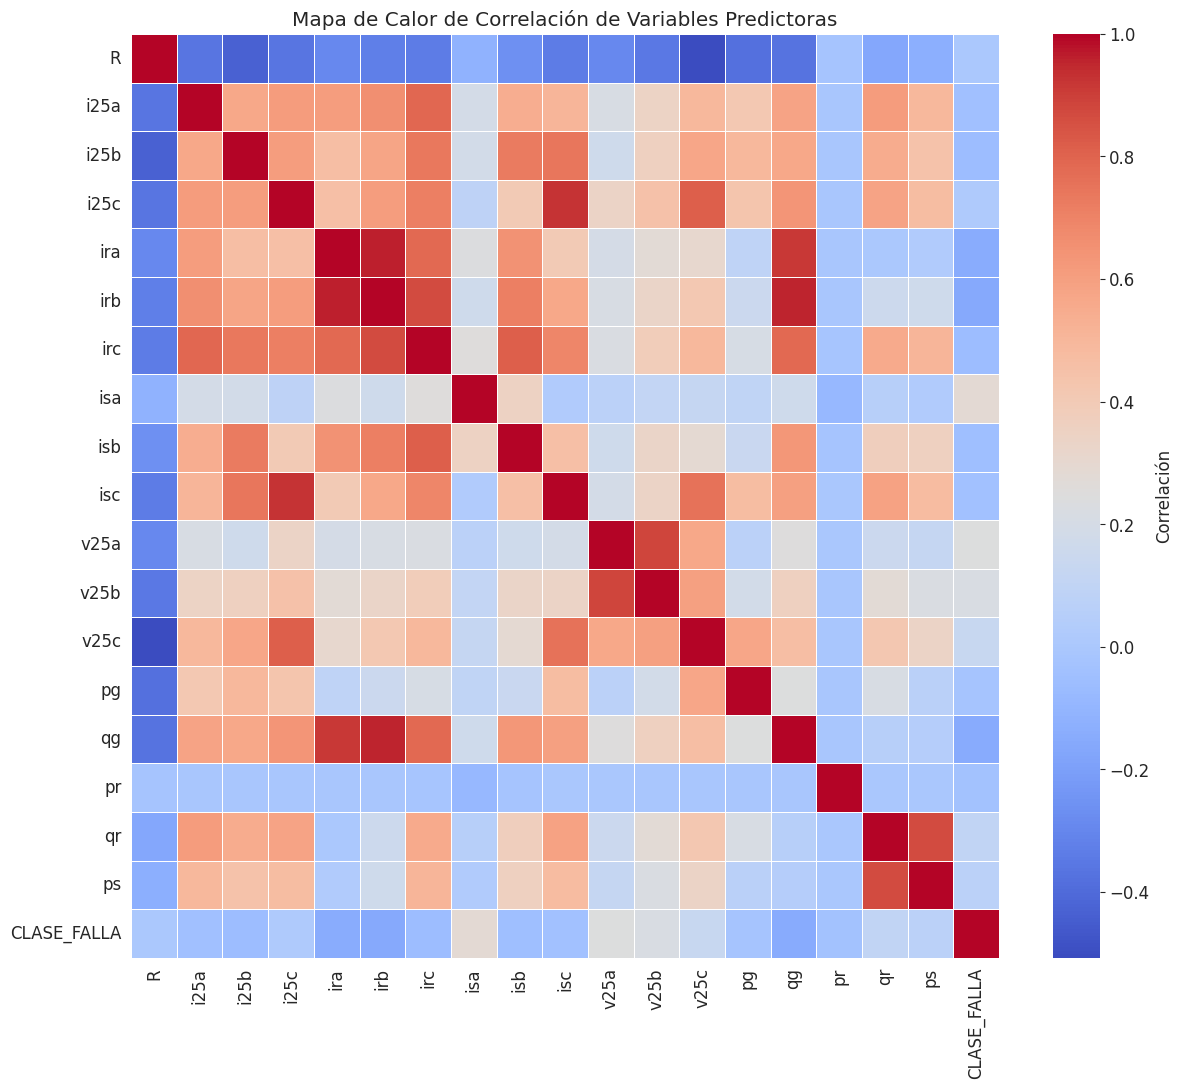

In [ ]:
# Mapa de calor para análisis
plt.figure(figsize=(14,12))
sns.heatmap(
    correlacion,
    annot=False, # ocultamos números para mejor legibilidad
    cmap='coolwarm',
    fmt='.2f',
    linewidths=.5,
    cbar_kws={'label': 'Correlación'}
    )
plt.title('Mapa de Calor de Correlación de Variables Predictoras')
plt.show()

## Informe de Cierre de la Exploración de Datos
El objetivo de esta fase fue comprender la estructura, calidad y distribución de los datos, así como identificar anomalías que impacten el modelo k-NN.

A. **Calidad y Consistencia del Dataset**

1.	*Instancias y Variables:* El dataset final de trabajo consta de 1,788 instancias y 19 columnas (18 predictoras y 1 objetivo).

2.	*Valores Constantes (Varianza Cero):* La variable ‘qs’ (Potencia Reactiva del Estator) fue identificada con una desviación estándar próxima a cero (constante) y fue eliminada, ya que no aporta capacidad predictiva.

3.	*Valores Nulos:* Se confirmó que el dataset no contiene valores nulos (NaN), eliminando la necesidad de imputación.

B. **Análisis de la Variable Objetivo ($Y$)**

1.	*Balance de Clases:* La variable objetivo (CLASE_FALLA) está perfectamente balanceada. Cada una de las 12 clases de falla tiene exactamente el mismo número de instancias. Esto es ideal, ya que evita el sesgo del modelo y garantiza que métricas simples como el Accuracy sean adecuadas para la evaluación.

C. **Análisis de las Variables Predictoras ($X$)**

1.	*Escala:* Los gráficos de dispersión (Boxplots) mostraron una diferencia extrema en las escalas de las variables.

o	Variables como R, v25x, pg, y qg operan en un rango de cientos o miles.

o	Variables como las corrientes (ixx) y potencias del rotor (pr, qr, ps) operan en un rango de milésimas o centésimas de unidad, haciendo que sus Boxplots sean casi planos (indicando una varianza minúscula).

o	Implicación para k-NN: La falta de estandarización haría que las variables con mayor magnitud (ej., R) dominaran la función de distancia, haciendo inútil el cálculo de la similitud.


2.	*Outliers:* Se detectó la presencia de numerosos outliers en la mayoría de las variables. Esto es esperado en datos de fallas eléctricas, donde las anomalías causan picos y lecturas extremas. Estos outliers no deben eliminarse sin un análisis exhaustivo, ya que podrían contener información crítica sobre las fallas.


3.	*Correlación y Multicolinealidad:* El análisis visual y la naturaleza de los datos confirman la alta multicolinealidad entre las variables de la misma fase (ej., las tres corrientes de red, i25a, i25b, i25c están fuertemente correlacionadas). Esta multicolinealidad es inherente al sistema eléctrico, pero no afecta negativamente al modelo k-NN (a diferencia de modelos basados en coeficientes, como la Regresión Logística).


D. **Conclusión y Justificación del Preprocesamiento**

La principal conclusión del EDA es la necesidad urgente de tratar la escala de los datos.

*Estrategia de Preprocesamiento:* Es obligatorio aplicar el Estandarizador (StandardScaler) para centrar los datos en la media (0) y escalar su varianza (1).
Esto garantiza que el algoritmo k-NN calcule distancias justas y que todas las variables predictoras contribuyan de manera equitativa a la clasificación de las fallas.


#### Diccionario de Datos

El dataset está conformado originalmente por **1,788 instancias** que contienen mediciones de un sistema eléctrico simulado, utilizadas para el **diagnóstico automatizado de la causa raíz de una anomalía**. Luego de una minuciosa inspección se detectó que la columna 'qs' no iba a ser utilizada para el modelado por lo que fue eliminada del dataframe. Las variables provienen del monitoreo de las potencias, voltajes y corrientes en tres zonas clave: la **Red**, el **Rotor** y el **Estator**.

| Nombre de Columna | Descripción Detallada | Tipo de Dato | Rol |
| :--- | :--- | :--- | :--- |
| **CLASE\_FALLA** | Etiqueta de la Falla Eléctrica (**Target**). Valores discretos del 1 al 12. | Numérico Discreto (int) | **Objetivo ($Y$)** |
| **R** | Valor de la **Resistencia** en el sistema. | Numérico Continuo (float) | Predictora ($X$) |
| **i25a** | Corriente de la **Red** (Grid), Fase A. | Numérico Continuo (float) | Predictora ($X$) |
| **i25b** | Corriente de la **Red** (Grid), Fase B. | Numérico Continuo (float) | Predictora ($X$) |
| **i25c** | Corriente de la **Red** (Grid), Fase C. | Numérico Continuo (float) | Predictora ($X$) |
| **ira** | Corriente del **Rotor** (Motor), Fase A. | Numérico Continuo (float) | Predictora ($X$) |
| **irb** | Corriente del **Rotor** (Motor), Fase B. | Numérico Continuo (float) | Predictora ($X$) |
| **irc** | Corriente del **Rotor** (Motor), Fase C. | Numérico Continuo (float) | Predictora ($X$) |
| **isa** | Corriente del **Estator** (Generador), Fase A. | Numérico Continuo (float) | Predictora ($X$) |
| **isb** | Corriente del **Estator** (Generador), Fase B. | Numérico Continuo (float) | Predictora ($X$) |
| **isc** | Corriente del **Estator** (Generador), Fase C. | Numérico Continuo (float) | Predictora ($X$) |
| **v25a** | Voltaje de la **Red** (Grid), Fase A. | Numérico Continuo (float) | Predictora ($X$) |
| **v25b** | Voltaje de la **Red** (Grid), Fase B. | Numérico Continuo (float) | Predictora ($X$) |
| **v25c** | Voltaje de la **Red** (Grid), Fase C. | Numérico Continuo (float) | Predictora ($X$) |
| **pg** | Potencia **Activa** (Real) de la **Red** (Grid). | Numérico Continuo (float) | Predictora ($X$) |
| **qg** | Potencia **Reactiva** (Aparente) de la **Red** (Grid). | Numérico Continuo (float) | Predictora ($X$) |
| **pr** | Potencia **Activa** (Real) del **Rotor**. | Numérico Continuo (float) | Predictora ($X$) |
| **qr** | Potencia **Reactiva** (Aparente) del **Rotor**. | Numérico Continuo (float) | Predictora ($X$) |
| **ps** | Potencia **Activa** (Real) del **Estator**. | Numérico Continuo (float) | Predictora ($X$) |

## Preprocesamiento de datos

### Escalado de variables predictoras

In [ ]:
# Aplicar StandardScaler (critico para k-NN)
scaler = StandardScaler()

# Ajustar y transformar los datos de las variables predictoras X
X_scaled_array = scaler.fit_transform(X)

# Convertir a dataframe
X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns)

# Prints de verificacion y resumen estadistico
print('Variables predictoras (X) escaladas.')
print('Resumen estadistico de media y desviación estandar de la variable predictora (X) escalada:')
estadisticas_escaladas = X_scaled.describe().T[['mean', 'std']]
display(estadisticas_escaladas)

Variables predictoras (X) escaladas.
Resumen estadistico de media y desviación estandar de la variable predictora (X) escalada:


,mean,std
R,7.947905e-18,1.00028
i25a,-4.132911e-16,1.00028
i25b,-1.589581e-16,1.00028
i25c,-1.986976e-17,1.00028
ira,-1.716748e-15,1.00028
irb,-1.939289e-15,1.00028
irc,3.544766e-15,1.00028
isa,-3.943751e-14,1.00028
isb,-5.563534e-17,1.00028
isc,3.497078e-16,1.00028


### Creacion del dataset listo para modelado